In [3954]:
############## Step 1: Data pre-processing ##############

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3956]:
### Load dataset and display the first 10 rows

df = pd.read_csv('/Users/ngocdiepnguyen/Downloads/Train.csv')
df.head(10)

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,74768,LP002231,1,1,0,1,0,8328,0.000000,17,363,1,2,1,6000
1,79428,LP001448,1,1,0,0,0,150,3857.458782,188,370,1,1,0,6000
2,70497,LP002231,0,0,0,0,0,4989,314.472511,17,348,1,0,0,6000
3,87480,LP001385,1,1,0,0,0,150,0.000000,232,359,1,1,1,3750
4,33964,LP002231,1,1,1,0,0,8059,0.000000,17,372,1,0,1,3750
5,20364,LP001778,0,1,0,0,0,1911,4145.477647,65,373,1,2,1,6000
6,63354,LP002180,1,1,3+,0,0,7121,926.791025,17,425,1,1,1,6000
7,67110,LP002585,1,1,1,0,0,3417,647.162564,17,366,1,0,1,6000
8,69254,LP001385,1,1,1,1,0,15965,0.000000,17,347,1,2,1,6000
9,92855,LP002175,1,1,0,0,0,150,0.000000,268,373,1,2,1,3750


In [3958]:
### Detect missing data/values

df.info()

# There is 1 float, 12 integers and 2 object data types
# Complete dataset, no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5898 non-null   int64  
 1   Loan_ID            5898 non-null   object 
 2   Gender             5898 non-null   int64  
 3   Married            5898 non-null   int64  
 4   Dependents         5898 non-null   object 
 5   Education          5898 non-null   int64  
 6   Self_Employed      5898 non-null   int64  
 7   ApplicantIncome    5898 non-null   int64  
 8   CoapplicantIncome  5898 non-null   float64
 9   LoanAmount         5898 non-null   int64  
 10  Loan_Amount_Term   5898 non-null   int64  
 11  Credit_History     5898 non-null   int64  
 12  Property_Area      5898 non-null   int64  
 13  Loan_Status        5898 non-null   int64  
 14  Total_Income       5898 non-null   int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 691.3+ KB


In [3960]:
# For descriptive statistics

df.describe()

# Not many participants seem to be self-employed
# Most participants have an undergraduate degree
# Average applicant monthly income is $7,782 
# Average loan amount is $97,400
# Loan amount terms are around 359 months ≈ 30 years (is that normal?)
# Average total income is $5,329 -> how come this is way less than the average applicant's monthly income?

,ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
count,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000
mean,54964.183452,0.910817,0.854527,0.120210,0.107664,7782.026958,1245.954548,97.410478,359.114954,0.920482,1.183961,0.832994,5239.284503
std,26133.640949,0.285032,0.352607,0.325235,0.309981,9182.571831,2368.012349,103.483478,48.876088,0.270569,0.730568,0.373013,2308.679455
min,10002.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,17.000000,12.000000,0.000000,0.000000,0.000000,1963.000000
25%,32337.000000,1.000000,1.000000,0.000000,0.000000,2342.250000,0.000000,17.000000,357.000000,1.000000,1.000000,1.000000,3750.000000
50%,55501.000000,1.000000,1.000000,0.000000,0.000000,6989.000000,117.562275,42.000000,368.000000,1.000000,1.000000,1.000000,6000.000000
75%,77775.750000,1.000000,1.000000,0.000000,0.000000,8375.000000,1680.894542,174.000000,372.000000,1.000000,2.000000,1.000000,6000.000000
max,99998.000000,1.000000,1.000000,1.000000,1.000000,81000.000000,20000.000000,700.000000,480.000000,1.000000,2.000000,1.000000,22500.000000


In [3962]:
# To confirm, there are no missing values

df.isnull().sum()

ID                   0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_Income         0
dtype: int64

In [3964]:
### Drop ID and Loan_ID

df = df.drop(['ID', 'Loan_ID', 'Total_Income'], axis=1)

In [3966]:
### Turn objects into numeric binary labels

binary_cols = ['Dependents']
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,0,1,0,8328,0.000000,17,363,1,2,1
1,1,1,0,0,0,150,3857.458782,188,370,1,1,0
2,0,0,0,0,0,4989,314.472511,17,348,1,0,0
3,1,1,0,0,0,150,0.000000,232,359,1,1,1
4,1,1,1,0,0,8059,0.000000,17,372,1,0,1
5,0,1,0,0,0,1911,4145.477647,65,373,1,2,1
6,1,1,3,0,0,7121,926.791025,17,425,1,1,1
7,1,1,1,0,0,3417,647.162564,17,366,1,0,1
8,1,1,1,1,0,15965,0.000000,17,347,1,2,1
9,1,1,0,0,0,150,0.000000,268,373,1,2,1


In [3968]:
### Identify categorical columns (excluding target and numeric types)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(categorical_cols)

# There are no categorical columns

[]


In [3970]:
############## Step 2: Data exploration ##############
############## Who tends to default? Does age, income, or education correlate with creditworthiness? ##############

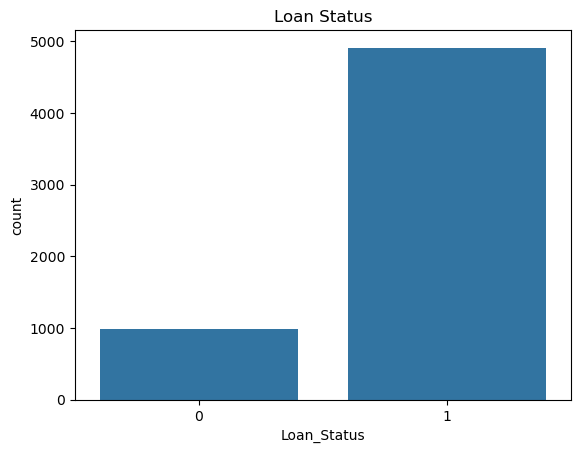

In [3972]:
### Distribution of Loan Status

sns.countplot(x='Loan_Status', data=df)
plt.title('Loan Status')
plt.show()

# 5000 applications have been approved, while 1000 applicants have not been approved
# Unbalanced dataset

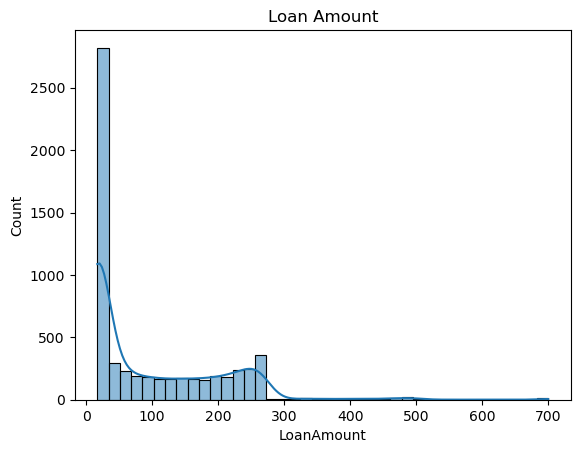

In [3974]:
### Distribution of Loan Amount

sns.histplot(df['LoanAmount'], kde=True)
plt.title('Loan Amount')
plt.show()

# The majority of applications (almost 3,000) requested a loan amount of approx. $25,000
# About 300 applications requested approx. $250,000
# There is a small amount of applications requesting more than $250,000

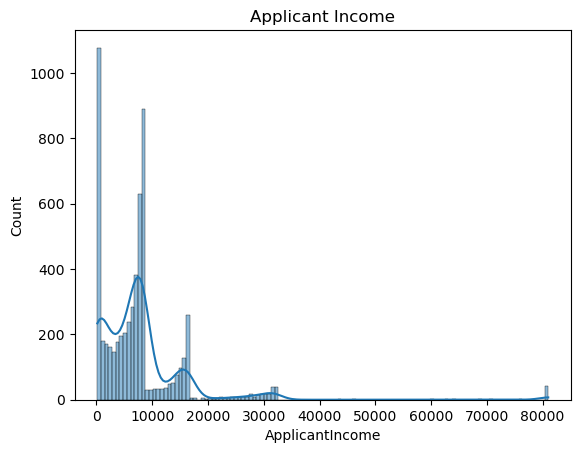

In [3976]:
### Bivariate analysis: Comparison between Loan Amount and Applicant Income

sns.histplot(df['ApplicantIncome'], kde=True)
plt.title('Applicant Income')
plt.show()

# There are applicants with no income, most are distributed at around $8,000

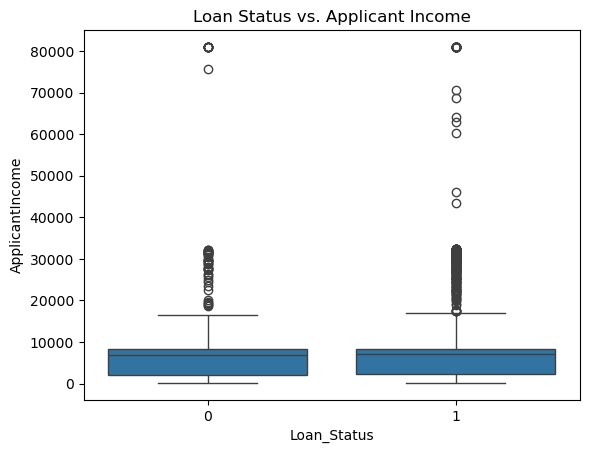

In [3977]:
### Bivariate analysis: Comparison between Loan Status and Applicant Income

sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title('Loan Status vs. Applicant Income')
plt.show()

# The majority of denied applicants have an income between $1,000 and $9,000 with very few outliers having $75,000 and over $80,000
# The majority of approved applicants also have income between $1,000 and $9,000, with more outliers having higher income overall

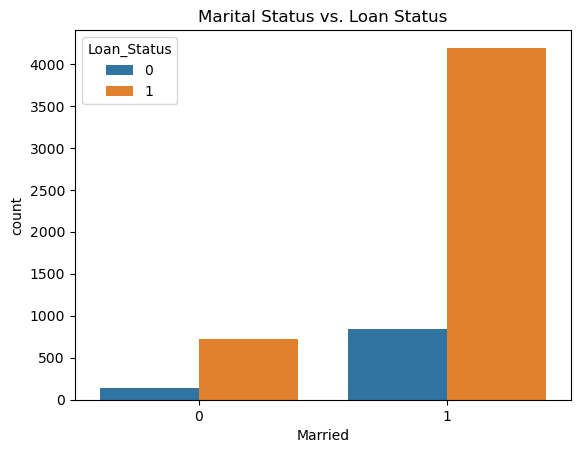

In [3979]:
### Bivariate analysis: Comparison between Marital Status and Loan Status

sns.countplot(x='Married', hue='Loan_Status', data=df)
plt.title('Marital Status vs. Loan Status')
plt.show()

# The trend is that married applicants (4000+) tend to be approved for loans more than non-married applicants (700).
# But keep in mind that the dataset also has more married individuals than non-married individuals
# It could be that more married individuals apply for loans than non-married individuals

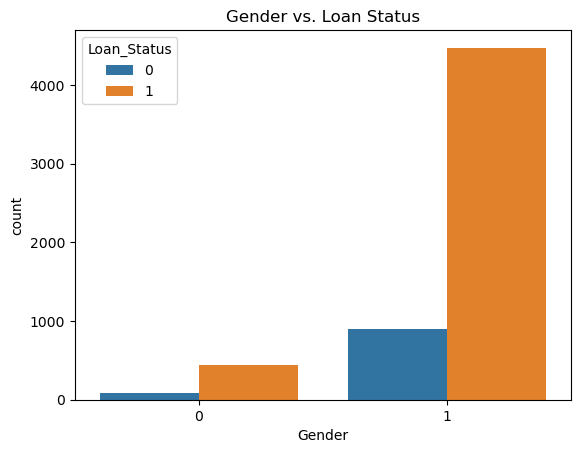

In [3982]:
### Bivariate analysis: Comparison between Gender and Loan Status

sns.countplot(x='Gender', hue='Loan_Status', data=df)
plt.title('Gender vs. Loan Status')
plt.show()

# Only about 500 women apply for loans, whereas it is the case with more than 5,000 men.
# Hence, more men get approved for loans than women.

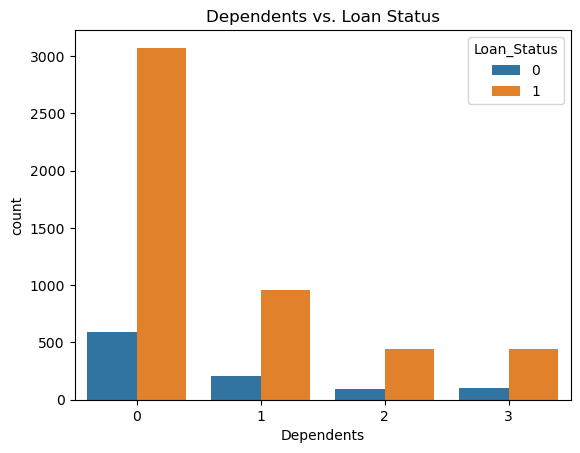

In [3984]:
### Bivariate analysis: Comparison between Dependents and Loan Status

sns.countplot(x='Dependents', hue='Loan_Status', data=df)
plt.title('Dependents vs. Loan Status')
plt.show()

# Those who do not have dependents (about 3,500) tend to apply for loans more than those with 1 or more dependents.
# It is interesting to note that the number of loan applicants with two or threeP dependants is roughly the same.

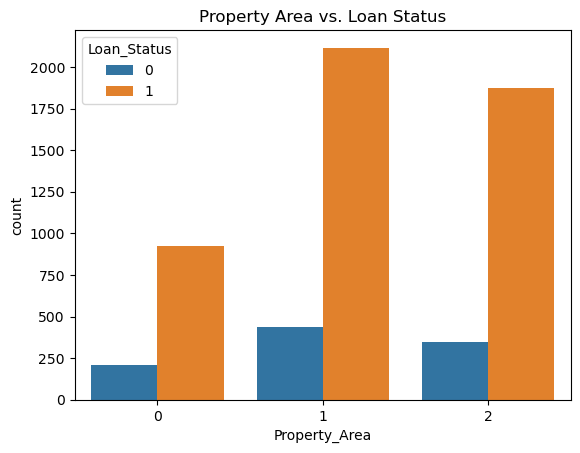

In [3986]:
### Bivariate analysis: Comparison between Property Area and Loan Status

sns.countplot(x='Property_Area', hue='Loan_Status', data=df)
plt.title('Property Area vs. Loan Status')
plt.show()

# Those residing in semi-urban areas seem to apply for loans the most, followed by rural and urban areas.

In [3988]:
############## Step 3: Build models and evaluate them ##############

In [3990]:
### Import scikit-learn library for predictive data analysis

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [1]:
### Split the data into training and test sets

X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 20% of data for testing, 80% for training
# random state = 42 as reference for a number parameter

NameError: name 'df' is not defined

In [3994]:
### Check class distribution

y_train.value_counts()

# 0 = 798 instances, 1 = 3920 instances 
# The number of observations in Loan Status is significantly higher than in the other, indicating an imbalanced dataset

Loan_Status
1    3920
0     798
Name: count, dtype: int64

In [3996]:
### 3.1: Start with logistic regression

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Total number of iterations reached limit: not suitable for this dataset

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [3998]:
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [4000]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
5745,1,1,0,0,0,7224,3180.790049,17,373,1,2
1978,1,0,0,0,0,150,8285.865369,17,356,1,2
1760,1,1,0,1,0,8122,1010.778812,213,357,1,1
3768,0,1,0,0,0,6691,667.268452,17,12,1,2
5400,1,1,0,0,0,150,0.000000,199,371,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3319,1,0,3,0,0,23058,2505.932282,67,352,1,0
838,1,1,0,0,0,7722,205.003332,232,353,0,2
1087,0,1,0,0,0,5016,2235.410467,17,427,1,2
1623,1,1,0,0,1,14259,0.000000,231,372,1,0


In [4002]:
# Get predictions using predict.proba

clf.predict_proba(X_test)

array([[0.14752242, 0.85247758],
       [0.16675377, 0.83324623],
       [0.16451231, 0.83548769],
       ...,
       [0.14893213, 0.85106787],
       [0.178441  , 0.821559  ],
       [0.18158534, 0.81841466]])

In [4004]:
### Use performance metrics: accuracy score

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

# The model has an accuracy score of 0.84

0.8415254237288136

In [4006]:
### Use performance metrics: precision score

from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

# This model has a precision of 0.84

0.8415254237288136

In [4008]:
### Use performance metrics: confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred, labels=[0,1])

# 0 = classified 0 times, 1 = classified 993 times -> very unusual

array([[  0, 187],
       [  0, 993]])

In [4010]:
### Use performance metrics: F1-score

from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

# 0.82

0.9139438564196962

In [4012]:
### Use performance metrics: classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       187
           1       0.84      1.00      0.91       993

    accuracy                           0.84      1180
   macro avg       0.42      0.50      0.46      1180
weighted avg       0.71      0.84      0.77      1180



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [4014]:
### Use performance metrics: ROC-AUC

from sklearn.metrics import roc_auc_score, roc_curve, auc
roc_auc_score(y_test, y_pred)

# 0.47 indicating a low discrimination between classes

0.5

In [4016]:
### 3.2: Continue with tree-based models

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [4018]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [4020]:
# Get predictions using predict.proba

clf.predict_proba(X_test)

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [4022]:
X_test
# 1180 rows x 14 columns

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
5745,1,1,0,0,0,7224,3180.790049,17,373,1,2
1978,1,0,0,0,0,150,8285.865369,17,356,1,2
1760,1,1,0,1,0,8122,1010.778812,213,357,1,1
3768,0,1,0,0,0,6691,667.268452,17,12,1,2
5400,1,1,0,0,0,150,0.000000,199,371,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3319,1,0,3,0,0,23058,2505.932282,67,352,1,0
838,1,1,0,0,0,7722,205.003332,232,353,0,2
1087,0,1,0,0,0,5016,2235.410467,17,427,1,2
1623,1,1,0,0,1,14259,0.000000,231,372,1,0


In [4024]:
# Get predictions

y_pred = clf.predict(X_test)
y_pred

array([1, 1, 0, ..., 1, 1, 1])

In [4026]:
# Get predictions using predict.proba

clf.predict_proba(X_test)

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [4028]:
### Use performance metrics: accuracy score

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

# This model has an accuracy of 0.73

0.6940677966101695

In [4030]:
### Use performance metrics: precision score

from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

# This model has a precision of 0.84

0.8333333333333334

In [4032]:
### Use performance metrics: confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred, labels=[0,1])

# 0 = classified 32 times, 1 = classified 795 times

array([[ 29, 158],
       [203, 790]])

In [4034]:
### Use performance metrics: recall score

from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

# The proportion of all actual positives that were classified correctly as positives is 0.80

0.7955689828801611

In [4036]:
### Use performance metrics: F1-score

from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

# A score of 0.82 indicates a balanced performance, demonstrating that the model can maintain high precision and high recall

0.8140133951571354

In [4038]:
### Use performance metrics: ROC-AUC

from sklearn.metrics import roc_auc_score, roc_curve, auc
roc_auc_score(y_test, y_pred)

# The ROC-AUC is 0.5, representing a 50% probability of correctly ranking a random positive and negative example.
# The model is not able to discriminate between classes, and is thus equivalent to making predictions at random.

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


0.4753245983919522

In [4040]:
### Use performance metrics: classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.12      0.16      0.14       187
           1       0.83      0.80      0.81       993

    accuracy                           0.69      1180
   macro avg       0.48      0.48      0.48      1180
weighted avg       0.72      0.69      0.71      1180



In [4042]:
### Use performance metrics: feature importances

feature_names = X.columns
feature_names

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [4044]:
clf.feature_importances_

array([0.02032845, 0.0175991 , 0.05000665, 0.03025319, 0.02152719,
       0.3003657 , 0.17227744, 0.18062148, 0.15222508, 0.01031761,
       0.04447811])

In [4046]:
feature_importance = pd.DataFrame(clf.feature_importances_, index = feature_names)
feature_importance

,0
Gender,0.020328
Married,0.017599
Dependents,0.050007
Education,0.030253
Self_Employed,0.021527
ApplicantIncome,0.300366
CoapplicantIncome,0.172277
LoanAmount,0.180621
Loan_Amount_Term,0.152225
Credit_History,0.010318


<Axes: >

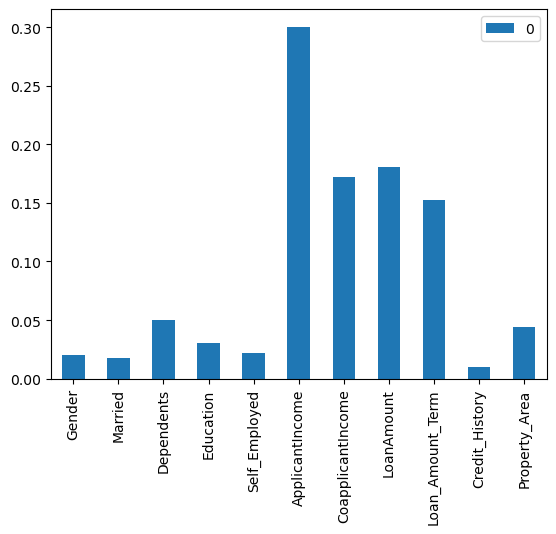

In [4048]:
feature_importance.plot(kind='bar')

# Applicant income with 0.3 is the most important factor for loan approval
# Loan Amount, Coapplicant Income and Loan Amount Term follow with 0.15-0.17

In [4056]:
### 3.3: Continue with XGBoost

import xgboost as xgb
from xgboost import XGBClassifier

In [4058]:
### Calculate the ratio of negative class to positive class

ratio = float(y_train.value_counts()[0]) / y_train.value_counts()[1]
ratio

# Every positive sample mistake the model makes will cost 2 times a negative sample mistake.

0.20357142857142857

In [4060]:
# Create an XGBoost classifier with the scale_pos_weight value

clf = XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=ratio,
    eval_metric='auc',
    use_label_encoder=True,
    random_state=42
)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [4062]:
clf.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': 'auc',
 'feature_types': None,
 'feature_weights': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': 0.20357142857142857,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [4064]:
clf.predict_proba(X_test)

array([[0.40055108, 0.5994489 ],
       [0.13589507, 0.8641049 ],
       [0.5234482 , 0.4765518 ],
       ...,
       [0.36394405, 0.63605595],
       [0.4873399 , 0.5126601 ],
       [0.21375442, 0.7862456 ]], dtype=float32)

In [4066]:
### Use performance metrics: accuracy score

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

# The model has an accuracy score of 0.81

0.6720338983050848

In [4068]:
### Use performance metrics: precision score

from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

# This model has a precision of 0.84

0.8404494382022472

In [4070]:
### Use performance metrics: confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred, labels=[0,1])

# 0 = classified 4 times, 1 = classified 955 times

array([[ 45, 142],
       [245, 748]])

In [4072]:
### Use performance metrics: recall score

from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

# The proportion of all actual positives that were classified correctly as positives is 0.96

0.7532729103726082

In [4074]:
### Use performance metrics: F1-score

from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

# A score of 0.90 indicates a very well-balanced performance, demonstrating that the model can maintain high precision and high recall

0.7944768985661179

In [4076]:
### Use performance metrics: ROC-AUC

from sklearn.metrics import roc_auc_score, roc_curve, auc
roc_auc_score(y_test, y_pred)

# The ROC-AUC is 0.5, which is a 50% probability of correctly ranking a random positive and negative example.

0.49695731080127736

In [4078]:
### Use performance metrics: feature importances

feature_names = X.columns
feature_names

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [4080]:
clf.feature_importances_

array([0.1199351 , 0.10031801, 0.07739779, 0.0824065 , 0.12637407,
       0.0902312 , 0.07752418, 0.07973543, 0.06916471, 0.09123594,
       0.08567712], dtype=float32)

In [4082]:
feature_importance = pd.DataFrame(clf.feature_importances_, index = feature_names)
feature_importance

,0
Gender,0.119935
Married,0.100318
Dependents,0.077398
Education,0.082406
Self_Employed,0.126374
ApplicantIncome,0.090231
CoapplicantIncome,0.077524
LoanAmount,0.079735
Loan_Amount_Term,0.069165
Credit_History,0.091236


<Axes: >

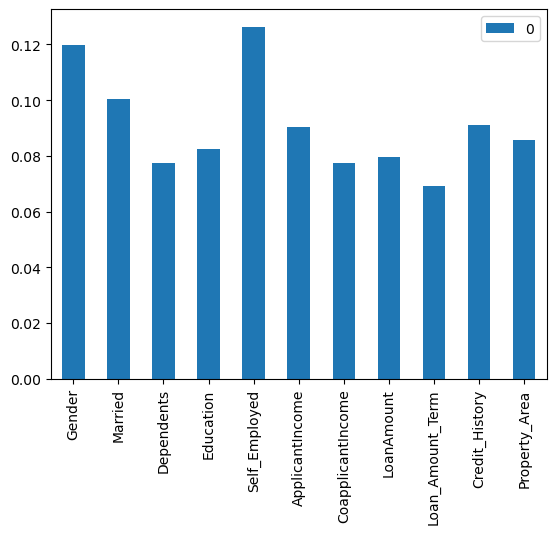

In [4084]:
feature_importance.plot(kind='bar')

# After scaling, all of the features seem to be equally important. There is not much difference.